# Tuning covariance matrices for KF and EKF
## Read Text file and make variables

In [43]:
#!/usr/bin/env python3

# read text files

import matplotlib.pyplot as plt
import numpy as np
import sys
from scipy import signal, fftpack
from scipy.signal import savgol_filter
%matplotlib inline

# enter data file here
data_file = "data_file_03-15-19_19-41-20"

path = "/Users/elenakern/university/masters/sai-2/apps/inertial_parameter_application/data_collection/kalman_filter/tuning/"
path_data_file = path + data_file
#data_file_03-15-19_19-41-20
#    Q.diagonal() << 1.0e-8, 1.0e-8, 1.0e-8, 1.0e-6, 1.0e-6, 1.0e-6, 1.0e-4, 1.0e-4, 1.0e-4;
#    R.diagonal() << 1.0e-12, 1.0e-12, 1.0e-12, 1.0e-3, 1.0e-3, 1.0e-3;
#    Q_ekf.diagonal() << 1.0e-7, 1.0e-7, 1.0e-7, 1.0e-7, 1.0e-6, 1.0e-6, 1.0e-6, 1.0e-7, 1.0e-7, 1.0e-7;
#    R_ekf.diagonal() << 1.0e-12, 1.0e-12, 1.0e-12, 1.0e-12, 1e-1, 1e-1, 1e-1;
file = np.loadtxt(path_data_file,skiprows=1)

pos = file[1::,0:3]
accel = file[1::,3:6]
kf_pos = file[1::,6:9]
kf_vel = file[1::,9:12]
kf_accel = file[1::,12:15]
ori = file[1::,15:19]
avel = file[1::,19:22]
ekf_ori = file[1::,22:26]
ekf_avel = file[1::,26:29]
ekf_aaccel = file[1::,29:32]

time = np.arange(np.size(pos[:,0]))
time = time/1000

In [44]:
#TUM colors rgb
blue = (0,0.3961,0.7412)
red = (0.7686,0.0275,0.1059)
green =(0,0.4863,0.1882)
orange =  (0.8902, 0.4471, 0.1333)
purple = (0.4118, 0.0314, 0.3529)
grey = (0.6118, 0.6157, 0.6235)
yellow = (0.9765, 0.7294, 0)
#turquoise = (0, 0.4667, 0.5412) 

In [45]:
def Plot_quaternions(time, quaternion_meas, quaternion_estimate):
    w = quaternion_meas[:,0]
    x = quaternion_meas[:,1]
    y = quaternion_meas[:,2]
    z = quaternion_meas[:,3]
    w_est = quaternion_estimate[:,0]
    x_est = quaternion_estimate[:,1]
    y_est = quaternion_estimate[:,2]
    z_est = quaternion_estimate[:,3]
    f, axarr = plt.subplots(2,2,figsize=(9,9))
    f.suptitle("Orientation represented as Unit Quaternions" , fontsize=20)
    axarr[0,0].plot(time, w, c=blue, label ="measurement")
    axarr[0,0].plot(time, w_est, c=red, label ="estimate")
    axarr[0,0].set_title("$q_w$")
    axarr[0,0].set_xlim([0, time[-1]])
    axarr[0,1].plot(time, x, c=blue,  label ="measurement")
    axarr[0,1].plot(time, x_est, c=red,  label ="estimate")
    axarr[0,1].set_title("$q_x$")
    axarr[0,1].set_xlim([0, time[-1]])
    axarr[1,0].plot(time, y, c=blue,  label ="measurement")
    axarr[1,0].plot(time, y_est, c=red,  label ="estimate")
    axarr[1,0].set_title("$q_y$")
    axarr[1,0].set_xlim([0, time[-1]])
    axarr[1,0].set_xlabel("Elapsed time in s")
    axarr[1,1].plot(time, z, c=blue,  label ="measurement")
    axarr[1,1].plot(time, z_est, c=red,  label ="estimate")
    axarr[1,1].set_title("$q_z$")
    axarr[1,1].set_xlim([0, time[-1]])
    axarr[1,1].set_xlabel("Elapsed time in s")
    plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
    plt.legend()

def Plot_three_dim_double(time, data_meas, data_est, title, subtitle):
    f, axarr = plt.subplots(3,1,figsize=(9,9))
    f.suptitle(title, fontsize=20)
    coordinates = ["$_x$","$_y$","$_z$"]
    for idx,coordinate in enumerate(coordinates):
        axarr[idx].plot(time, data_meas[:,idx], c=blue, label = "measurement")
        axarr[idx].plot(time, data_est[:,idx], c=red, label = "estimate")
        axarr[idx].set_title(subtitle+str(coordinate))
        axarr[idx].set_xlim([0, time[-1]])
        axarr[idx].legend()
    axarr[2].set_xlabel("Elapsed time in $s$")
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    
def Plot_three_dim(time, data, title, subtitle):
    f, axarr = plt.subplots(3,1,figsize=(9,9))
    f.suptitle(title, fontsize=20)
    coordinates = ["$_x$","$_y$","$_z$"]
    for idx,coordinate in enumerate(coordinates):
        axarr[idx].plot(time, data[:,idx], c=blue)
        axarr[idx].set_title(subtitle+str(coordinate))
        axarr[idx].set_xlim([0, time[-1]])
    axarr[2].set_xlabel("Elapsed time in $s$")
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)

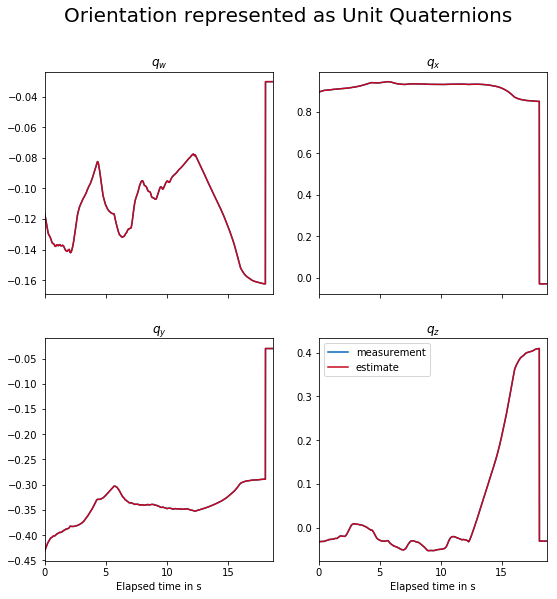

In [46]:
Plot_quaternions(time, ori, ekf_ori)


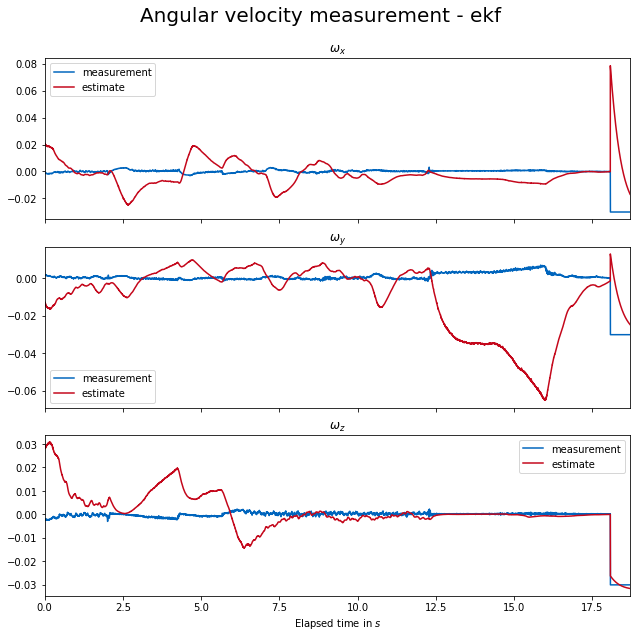

In [47]:
Plot_three_dim_double(time, avel, ekf_avel, 'Angular velocity measurement - ekf', '$\omega$')

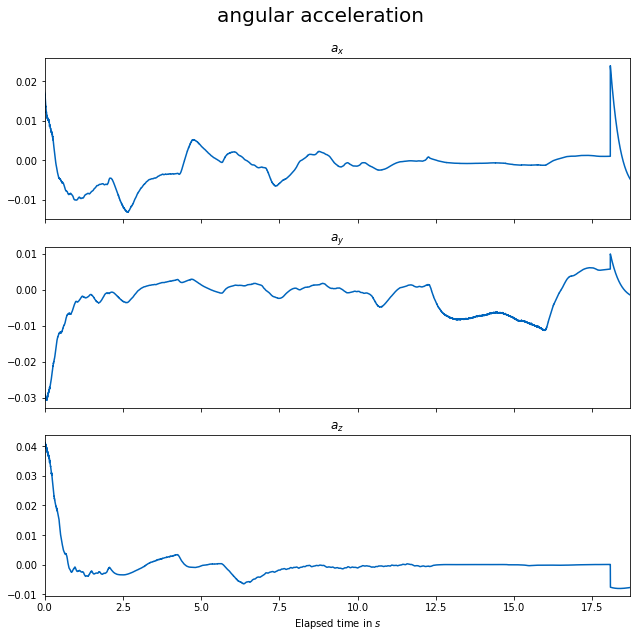

In [48]:
Plot_three_dim(time, ekf_aaccel, "angular acceleration", '$a$')

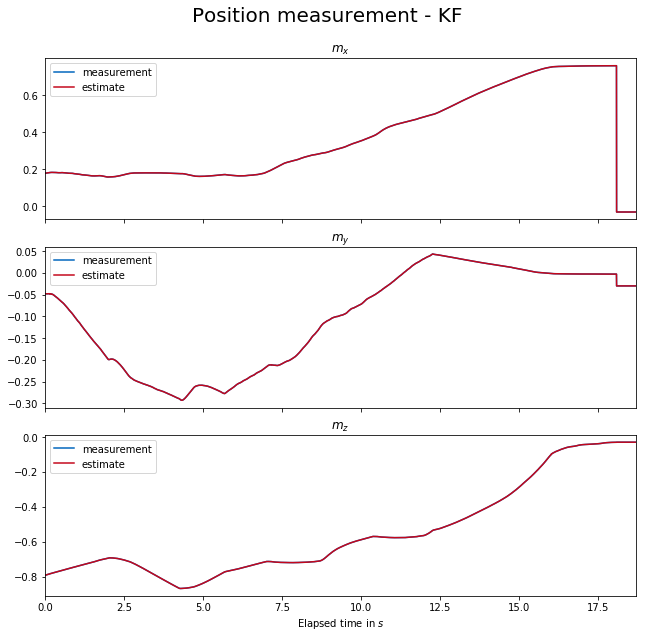

In [49]:
Plot_three_dim_double(time, pos, kf_pos, 'Position measurement - KF', '$m$')

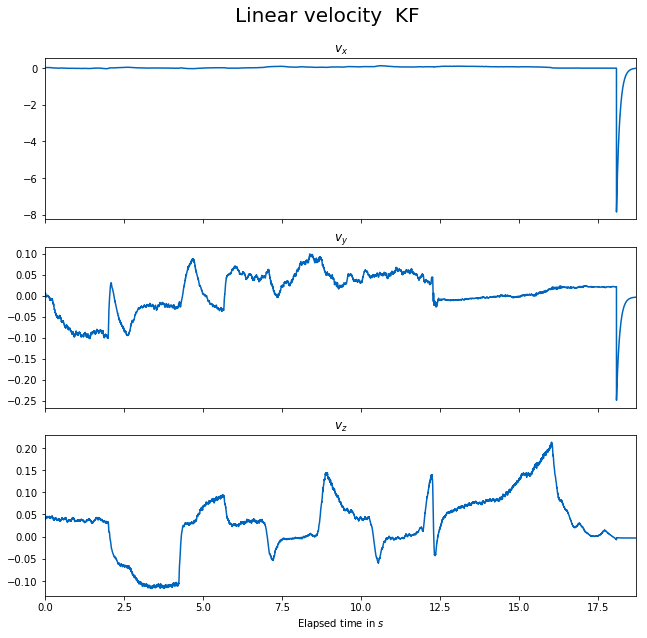

In [50]:
Plot_three_dim(time, kf_vel, 'Linear velocity  KF', '$v$')

ValueError: x and y must have same first dimension, but have shapes (18715,) and (18049,)

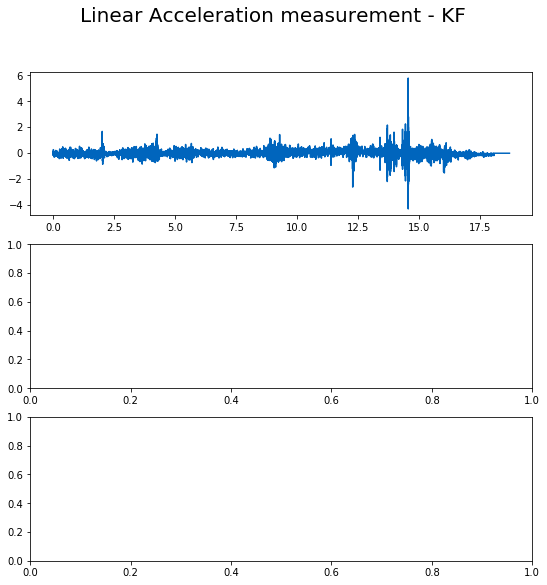

In [51]:
Plot_three_dim_double(time, accel, kf_acc, 'Linear Acceleration measurement - KF', '$a$')